In [20]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [21]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense

In [22]:
import os
import cv2
from PIL import Image
import numpy as np

image_directory = '../input/ones-and-zeros/'
SIZE = 512  ##also try for 256, 1024, 2048, and original 2800 and see the time taking

dataset = []  #Many ways to handle data, you can use pandas. Here, we are using a list format.  
label = []  #Place holders to define add labels. We will add 0 to all parasitized images and 1 to uninfected.

zero_images = os.listdir(image_directory + 'zero/')
for i, image_name in enumerate(one_images):    #Remember enumerate method adds a counter and returns the enumerate object
    
    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(image_directory + 'zero/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(0)

#Iterate through all images in one folder
#Then save into the same numpy array 'dataset' but with label 1

one_images = os.listdir(image_directory + 'one/')
for i, image_name in enumerate(zero_images):
    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(image_directory + 'one/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(1)

dataset = np.array(dataset)
label = np.array(label)


# In[28]:


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size = 0.20, 
                                                    random_state = 0)

#Normalization is a rescaling of the data from the original range 
#so that all values are within the range of 0 and 1.

from tensorflow.keras.utils import normalize
X_train = normalize(X_train, axis=1)
X_test = normalize(X_test, axis=1)

#Do not do one-hot encoding as it generates a shape of (num, 2)
#But the network expects an input of (num, 1) for the last layer for binary classification
#y_train = to_categorical(y_train)
#y_test = to_categorical(y_test)

In [23]:
###2 conv and pool layers. with some normalization and drops in between.

INPUT_SHAPE = (SIZE, SIZE, 3)   #change to (SIZE, SIZE, 3)


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))  


#Softmax is useful for mutually exclusive classes

#class is given a probability and all add to 1. Highest one wins. 

#Sigmoid outputs probability. Can be used for non-mutually exclusive problems.
#But, also good for binary mutually exclusive (one or zero). 

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',             #also try adam
              metrics=['accuracy'])

print(model.summary())    

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 510, 510, 32)      896       
_________________________________________________________________
activation_5 (Activation)    (None, 510, 510, 32)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 255, 255, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 253, 253, 32)      9248      
_________________________________________________________________
activation_6 (Activation)    (None, 253, 253, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 124, 124, 64)     

Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 0.6927 - accuracy: 0.5625 - val_loss: 0.9606 - val_accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 2s 2s/step - loss: 0.3994 - accuracy: 0.7500 - val_loss: 3.3934 - val_accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 2s 2s/step - loss: 2.5572 - accuracy: 0.5625 - val_loss: 3.4610 - val_accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 2s 2s/step - loss: 1.8921 - accuracy: 0.5000 - val_loss: 0.2192 - val_accuracy: 0.7500
Epoch 5/10
1/1 [==============================] - 2s 2s/step - loss: 0.0332 - accuracy: 1.0000 - val_loss: 0.2220 - val_accuracy: 0.7500
Epoch 6/10
1/1 [==============================] - 2s 2s/step - loss: 0.0153 - accuracy: 1.0000 - val_loss: 0.1678 - val_accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 2s 2s/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.1252 - val_accuracy: 1.0000
Epoch 8/10
1/1 [=========================

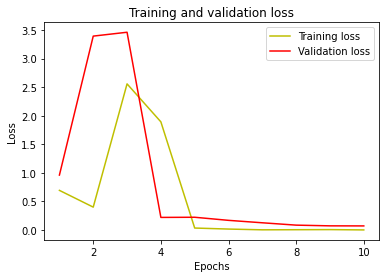

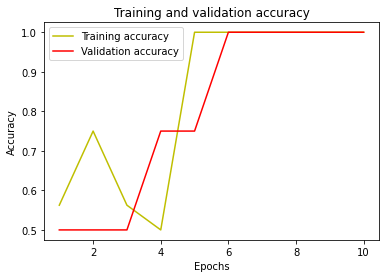

The prediction for this image is:  [[0.8867192]]
The actual label for this image is:  1
1/1 [==============================] - 0s 230ms/step - loss: 0.0704 - accuracy: 1.0000
Accuracy =  100.0 %


(2800, 2800, 3)

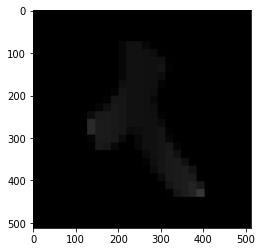

In [24]:
history = model.fit(X_train, 
                         y_train,  
                         verbose = 1, 
                         epochs = 10,      
                         validation_data=(X_test,y_test),
                         shuffle = False
                     )


# In[30]:


#plot the training and validation accuracy loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# In[15]:


#plot the training and validation accuracy at each epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# In[31]:


#Test the model on one image

n=0, #1,2,3
img = X_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
print("The prediction for this image is: ", model.predict(input_img))
print("The actual label for this image is: ", y_test[n])


# In[32]:


##Accuracy
_, acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")


# In[33]:


##check the dimension of image
from skimage import io
img = io.imread('../input/ones-and-zeros/one/1.jpg')
img.shape


# In[ ]:
